# Decision Tree on Abalone using Pipeline

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


In [31]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=column_names)

In [33]:
abalone_data.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
2502,I,0.285,0.210,0.070,0.1090,0.0440,0.0265,0.033,5
2965,M,0.670,0.525,0.195,1.4405,0.6595,0.2675,0.425,9
3590,F,0.650,0.520,0.195,1.6275,0.6890,0.3905,0.432,11
509,I,0.560,0.445,0.155,0.8735,0.3005,0.2090,0.275,16
1726,F,0.660,0.535,0.175,1.5175,0.7110,0.3125,0.415,12
2322,M,0.530,0.435,0.135,0.7365,0.3275,0.1315,0.220,12
2948,F,0.635,0.500,0.190,1.2900,0.5930,0.3045,0.352,8
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,9
4088,M,0.600,0.470,0.130,1.0105,0.4230,0.2190,0.298,9
2099,F,0.400,0.310,0.115,0.3465,0.1475,0.0695,0.115,10


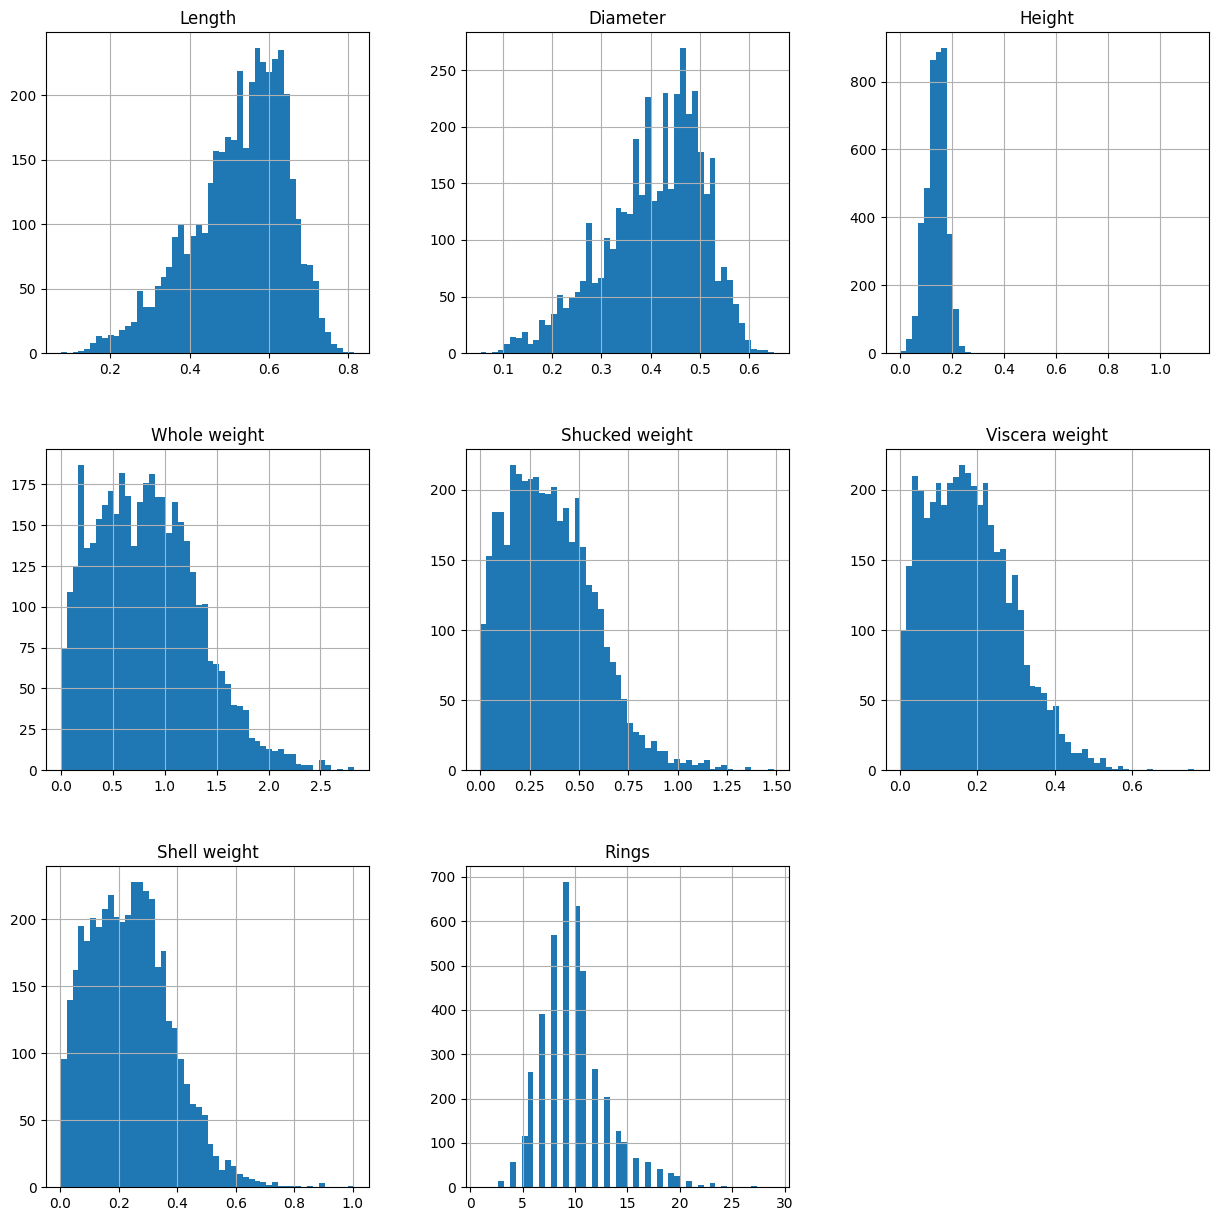

In [34]:
abalone_data.hist(bins=50, figsize=(15,15))
plt.show()

<Figure size 640x480 with 0 Axes>

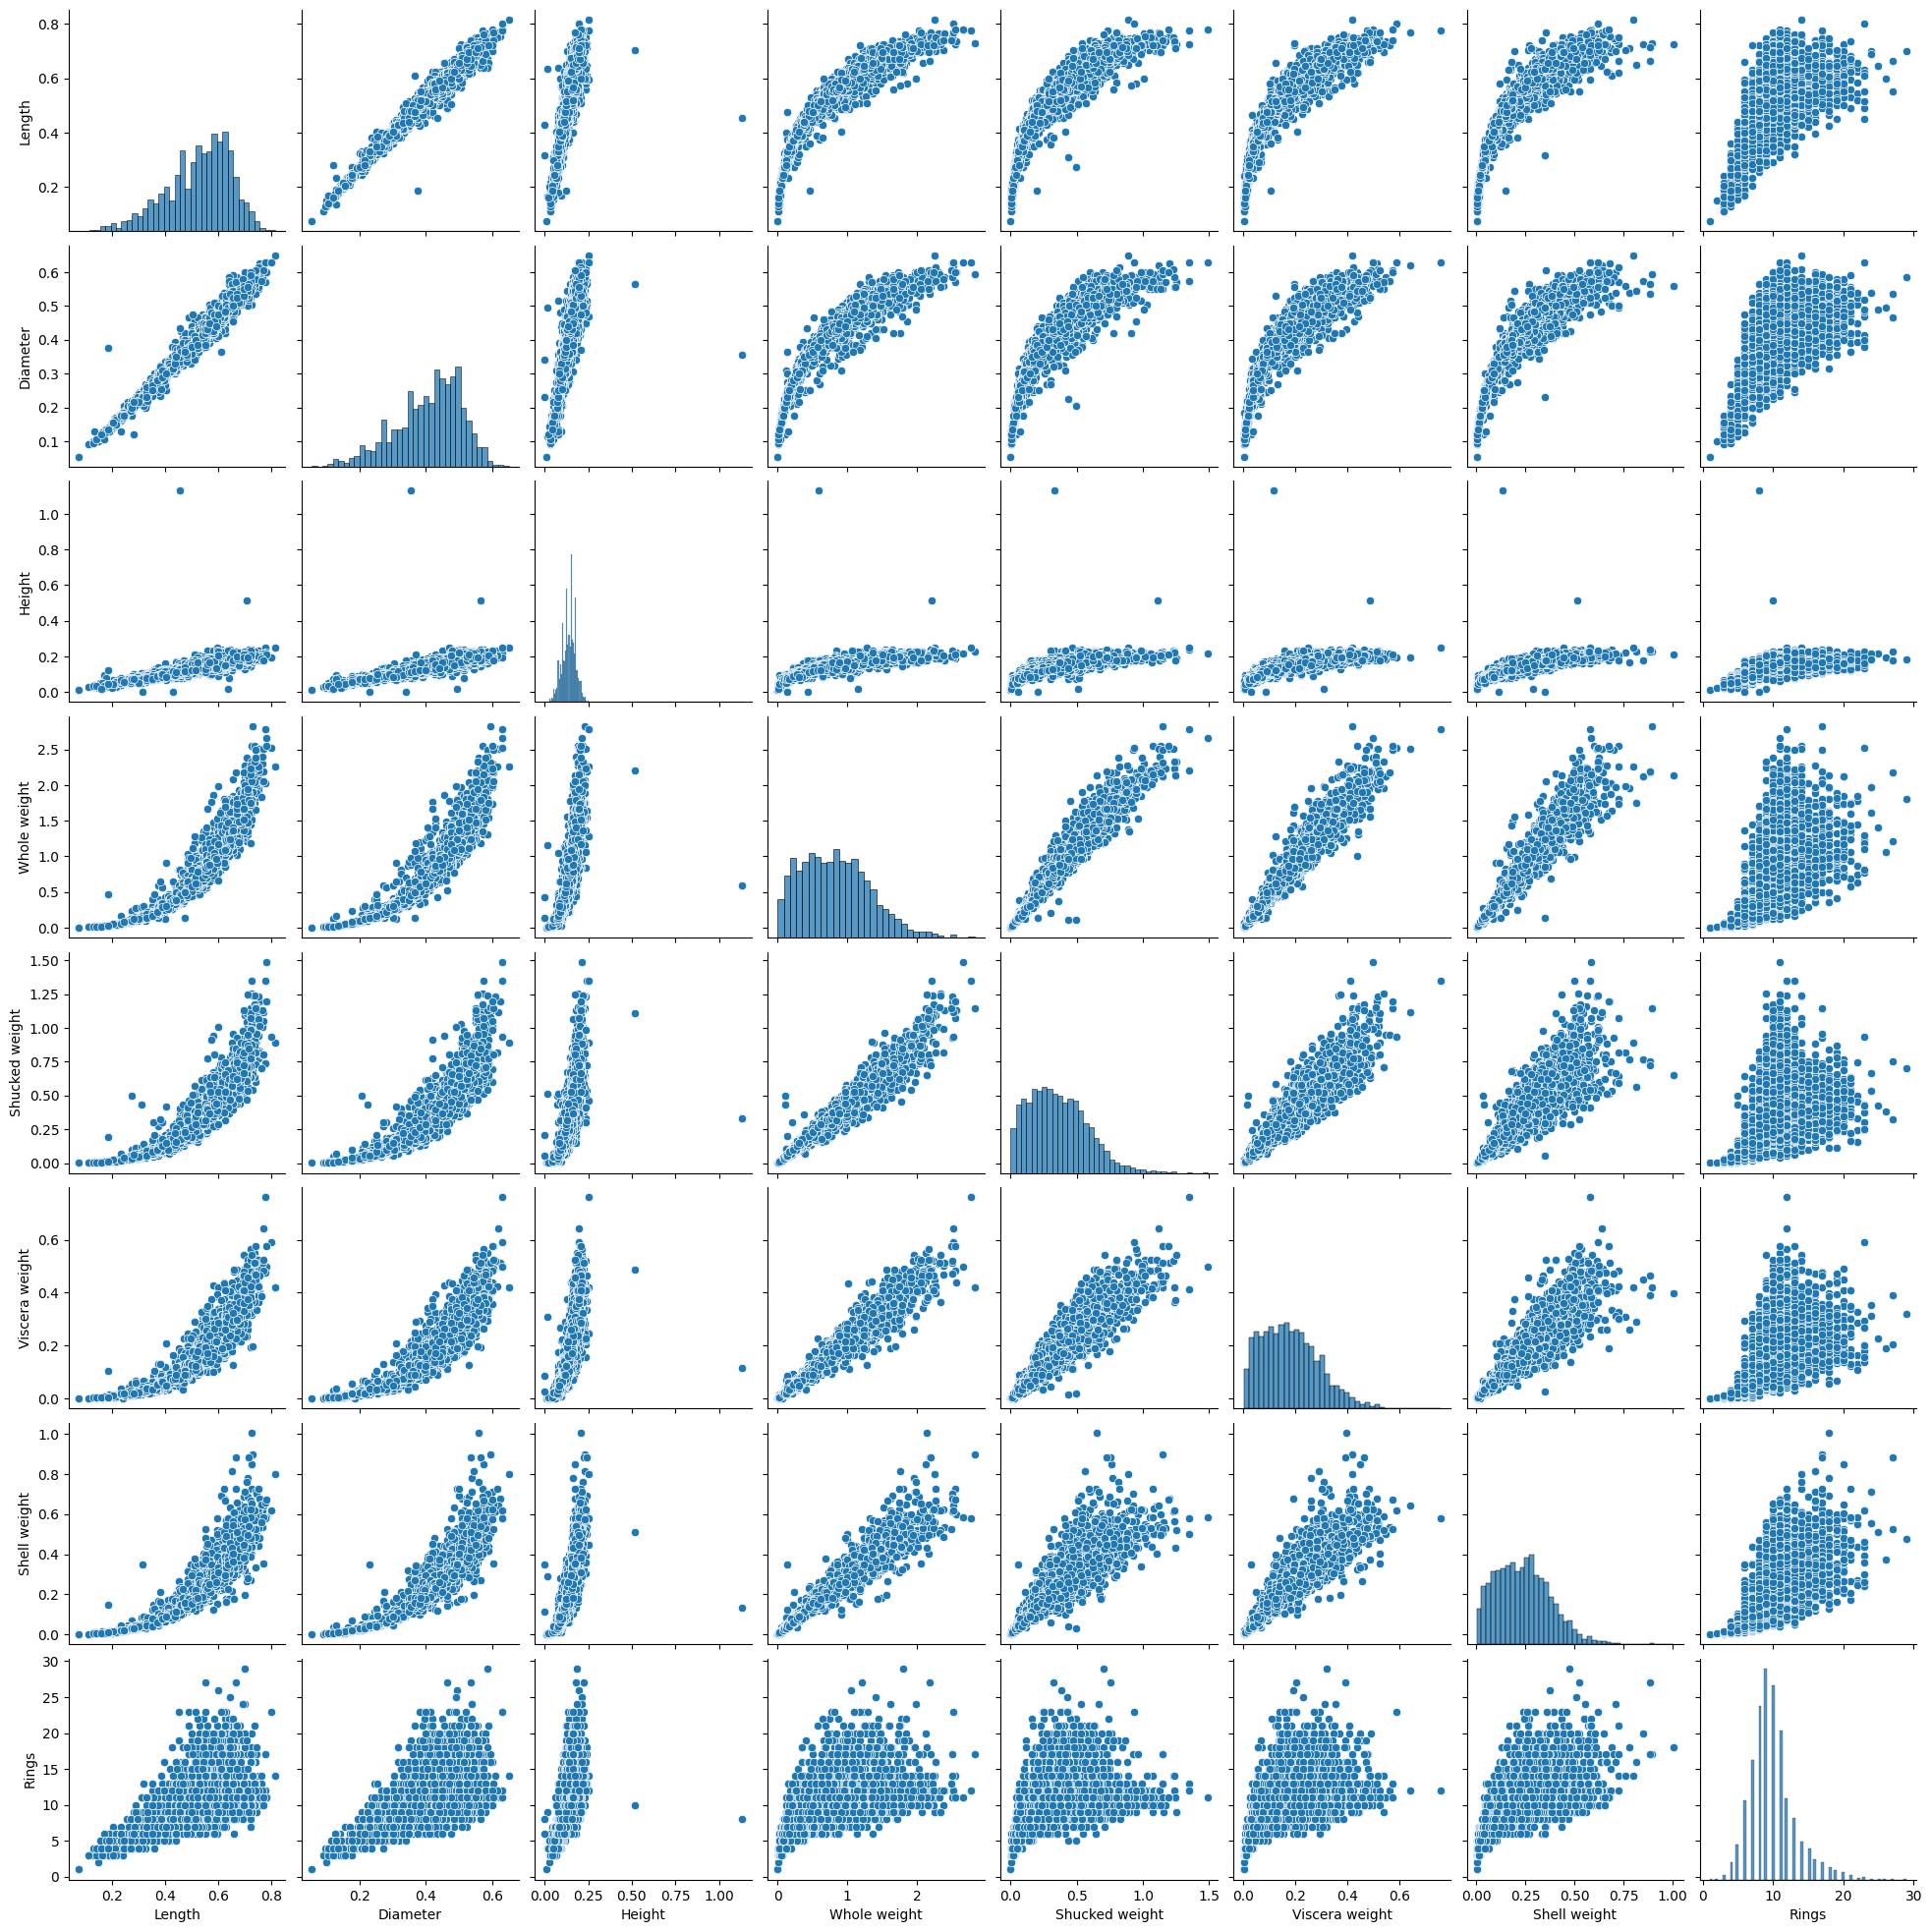

In [35]:
plt.figure()
sns.pairplot(abalone_data, diag_kind = 'hist')
plt.show()

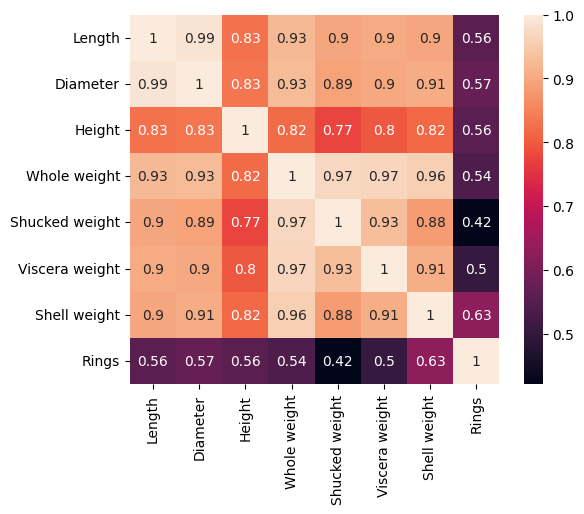

In [36]:
plt.figure()
sns.heatmap(
    abalone_data.drop(columns=['Sex']).corr(),
    annot=True,
    square=True
)
plt.show()


# missing values

In [37]:
(abalone_data[ 'Height'] == 0). sum()

np.int64(2)

In [38]:
means = pd.pivot_table(abalone_data, index = ['Sex'], aggfunc = {'Height': np.mean})
means

/var/folders/z8/nbvk5kgd18g2blb0t3nbxnmm0000gn/T/ipykernel_20145/1675280992.py:1: FutureWarning: The provided callable <function mean at 0x10614beb0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  means = pd.pivot_table(abalone_data, index = ['Sex'], aggfunc = {'Height': np.mean})


,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [39]:
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [42]:
numerical_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
categorical_features = ["Sex"]

In [43]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=0, strategy='constant', fill_value='0.107996')),
    ('scaler', StandardScaler())
])

In [44]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [48]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [49]:
clf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=3, random_state=24))
])

In [50]:
clf.fit(X_train, y_train)

ValueError: fill_value='0.107996' (of type <class 'str'>) cannot be cast to the input data that is dtype('float64'). If fill_value is a Python scalar, instead pass  a numpy scalar (e.g. fill_value=np.uint8(0) if your data is of type np.uint8). Make sure that both dtypes are of the same kind.